# Unit 2 Lesson 5 Challenge: Validating a linear regression

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn import preprocessing
import math
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
fbi_data = pd.read_csv('offenses_known_to_law_enforcement1.csv')

### Exploring the data

In [3]:
fbi_data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [4]:
fbi_data.describe()

,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000,0.000,187.000
mean,1.566,nan,1.872
std,18.304,nan,10.693
min,0.000,nan,0.000
25%,0.000,nan,0.000
50%,0.000,nan,0.000
75%,0.000,nan,1.000
max,335.000,nan,132.000


### Data Cleaning

In [5]:
fbi_data = fbi_data.drop(['Rape\n(revised\ndefinition)1'], axis =1)

In [6]:
fbi_data.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape2', 'Robbery', 'AggAssault', 'PropCrime', 'Burglary', 'Larceny', 'AutoTheft', 'Arson']

In [7]:
fbi_data = fbi_data.fillna(0)

In [8]:
# Need to convert the column's data from strings
fbi_data['Murder'] = fbi_data['Murder'].astype(int)
fbi_data['Arson'] = fbi_data['Arson'].astype(int)
fbi_data['Robbery'] = fbi_data['Robbery'].str.replace(',', '')
fbi_data['Population'] = fbi_data['Population'].str.replace(',', '')
fbi_data['Robbery'] = fbi_data['Robbery'].astype(int)
fbi_data['Population'] = fbi_data['Population'].astype(int)
fbi_data['PropCrime'] = fbi_data['PropCrime'].str.replace(',', '')
fbi_data['Larceny'] = fbi_data['Larceny'].str.replace(',', '')
fbi_data['AutoTheft'] = fbi_data['AutoTheft'].str.replace(',', '')
fbi_data['Burglary'] = fbi_data['Burglary'].str.replace(',', '')
fbi_data['PropCrime'] = fbi_data['PropCrime'].astype(int)

In [9]:
fbi_data.describe()

,Population,Murder,Robbery,PropCrime,Arson
count,348.000,348.000,348.000,348.000,348.000
mean,40037.632,1.566,72.902,792.606,1.006
std,450037.368,18.304,1031.033,7659.725,7.885
min,526.000,0.000,0.000,0.000,0.000
25%,3003.000,0.000,0.000,40.500,0.000
50%,7233.500,0.000,1.000,112.500,0.000
75%,18427.500,0.000,5.000,341.000,0.000
max,8396126.000,335.000,19170.000,141971.000,132.000


In [10]:
new_fbi_data_col = ["Population", "Murder", "Robbery", "PropCrime", "Arson"]
new_fbi_data = fbi_data[new_fbi_data_col]

###  Creating a new feature and fitting the model

In [11]:
new_data = new_fbi_data[(np.abs(stats.zscore(new_fbi_data)) <= 1.5).all(axis=1)]

In [12]:
linear_formula = 'np.log(new_data.Population) ~ Murder+Arson+Robbery'

In [13]:
new_data.describe()

,Population,Murder,Robbery,PropCrime,Arson
count,342.000,342.000,342.000,342.000,342.000
mean,14168.538,0.269,9.485,295.304,0.363
std,20128.683,1.096,34.266,496.602,1.207
min,526.000,0.000,0.000,0.000,0.000
25%,2979.750,0.000,0.000,39.000,0.000
50%,7074.500,0.000,1.000,111.000,0.000
75%,17611.250,0.000,4.000,331.750,0.000
max,199134.000,10.000,390.000,4090.000,10.000


In [15]:
lm = smf.ols(formula= linear_formula, data=new_data).fit()

In [16]:
lm.params

Intercept   8.705
Murder      0.134
Arson       0.191
Robbery     0.009
dtype: float64

In [17]:
lm.pvalues

Intercept   0.000
Murder      0.095
Arson       0.000
Robbery     0.001
dtype: float64

In [18]:
new_linear_formula = 'np.log(new_data.Population) ~ Arson+Robbery'

In [19]:
new_lm = smf.ols(formula= new_linear_formula, data=new_data).fit()

In [22]:
new_lm.params

Intercept   8.713
Arson       0.174
Robbery     0.013
dtype: float64

In [23]:
new_lm.pvalues

Intercept   0.000
Arson       0.000
Robbery     0.000
dtype: float64

In [29]:
new_lm.rsquared

0.23606674898057978

In [24]:
new_lm.conf_int()

,0,1
Intercept,8.600,8.827
Arson,0.077,0.272
Robbery,0.009,0.016


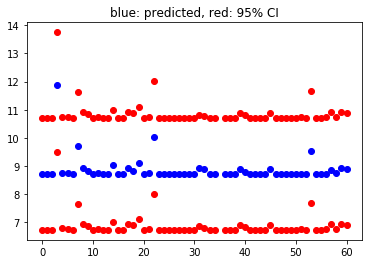

In [31]:
prstd, iv_l, iv_u = wls_prediction_std(new_lm)

plt.figure()
plt.plot(iv_u[0:60], 'o', color='r')
plt.plot(iv_l[0:60], 'o', color='r')
plt.plot(lm.fittedvalues[0:60], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()